Exercicis d'anàlisi de sentiment i textos.

In [13]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist

# Descargar el recurso de stopwords
nltk.download('stopwords')

# Descargar el recurso necesario para la tokenización de palabras
nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.sentiment import SentimentIntensityAnalyzer


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vsanc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vsanc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vsanc\AppData\Roaming\nltk_data...


## Excercici 1

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

El texto es sobre una chica que ha visto la nueva película de neflix Lift.

Los procesos que vamos a realizar son:  
    **· Tokenización**  
    **· Frecuencia**

### Lift (2024 film)

Walking into the cinema, my excitement bubbled as I settled into my seat, ready to be swept away by the much-anticipated "Lift," a 2024 film directed by Julia Harper. The dimming lights signaled the beginning of a cinematic journey that promised to be nothing short of extraordinary.

From the film's mysterious prologue, I found myself captivated by the storytelling prowess and visual artistry on display. Julia Harper's direction, coupled with breathtaking cinematography, immediately immersed me in a world of emotions and picturesque landscapes that set the stage for the characters' unfolding journey.

Emily Thompson's portrayal of the protagonist struck a chord within me, as her character navigated the complexities of life with authenticity and grace. The highs and lows of her journey resonated deeply, and I couldn't help but feel a personal connection to the raw and genuine performance.

"Lift" unfolded with themes of self-discovery, resilience, and the indomitable spirit of the human soul. The narrative touched on aspects of my own life, prompting reflection on my journey and the challenges that have shaped me into who I am today.

The supporting cast added layers of richness to the storytelling, with each character contributing a unique flavor to the narrative. The ensemble of actors, both seasoned and fresh talents, brought the story to life in a way that kept me engaged from the opening scenes to the final credits.

What stood out most to me was the film's masterful use of symbolism and metaphor. The title, "Lift," took on profound meanings throughout the story, symbolizing personal growth, the elevating power of love, and the triumph over obstacles that weigh us down.

As the credits rolled and the lights brightened the theater, I felt a sense of fulfillment. "Lift" had exceeded my expectations, leaving an indelible mark on my cinematic experience. Eager to share my thoughts, I left the theater inspired to discuss the layers of meaning and the emotional journey I had just witnessed.

"Lift" wasn't just a movie; it was a deeply personal exploration that resonated with me on multiple levels. Stepping out into the world, I carried with me the echoes of its messages, inspired to embark on my own uplifting journey of self-discovery.

Vamos a realizar un análisis de sentimiento en el texto utilizando la biblioteca NLTK de Python, específicamente el módulo VADER (Valence Aware Dictionary and sEntiment Reasoner).

### Texto a Analizar

In [2]:
texto = """
Walking into the cinema, my excitement bubbled as I settled into my seat, ready to be swept away by the much-anticipated "Lift," a 2024 film directed by Julia Harper. The dimming lights signaled the beginning of a cinematic journey that promised to be nothing short of extraordinary.

From the film's mysterious prologue, I found myself captivated by the storytelling prowess and visual artistry on display. Julia Harper's direction, coupled with breathtaking cinematography, immediately immersed me in a world of emotions and picturesque landscapes that set the stage for the characters' unfolding journey.

Emily Thompson's portrayal of the protagonist struck a chord within me, as her character navigated the complexities of life with authenticity and grace. The highs and lows of her journey resonated deeply, and I couldn't help but feel a personal connection to the raw and genuine performance.

"Lift" unfolded with themes of self-discovery, resilience, and the indomitable spirit of the human soul. The narrative touched on aspects of my own life, prompting reflection on my journey and the challenges that have shaped me into who I am today.

The supporting cast added layers of richness to the storytelling, with each character contributing a unique flavor to the narrative. The ensemble of actors, both seasoned and fresh talents, brought the story to life in a way that kept me engaged from the opening scenes to the final credits.

What stood out most to me was the film's masterful use of symbolism and metaphor. The title, "Lift," took on profound meanings throughout the story, symbolizing personal growth, the elevating power of love, and the triumph over obstacles that weigh us down.

As the credits rolled and the lights brightened the theater, I felt a sense of fulfillment. "Lift" had exceeded my expectations, leaving an indelible mark on my cinematic experience. Eager to share my thoughts, I left the theater inspired to discuss the layers of meaning and the emotional journey I had just witnessed.

"Lift" wasn't just a movie; it was a deeply personal exploration that resonated with me on multiple levels. Stepping out into the world, I carried with me the echoes of its messages, inspired to embark on my own uplifting journey of self-discovery.
"""


### Tokenización de Oraciones

In [3]:
tokenized_texto = sent_tokenize(texto)
print(tokenized_texto)

['\nWalking into the cinema, my excitement bubbled as I settled into my seat, ready to be swept away by the much-anticipated "Lift," a 2024 film directed by Julia Harper.', 'The dimming lights signaled the beginning of a cinematic journey that promised to be nothing short of extraordinary.', "From the film's mysterious prologue, I found myself captivated by the storytelling prowess and visual artistry on display.", "Julia Harper's direction, coupled with breathtaking cinematography, immediately immersed me in a world of emotions and picturesque landscapes that set the stage for the characters' unfolding journey.", "Emily Thompson's portrayal of the protagonist struck a chord within me, as her character navigated the complexities of life with authenticity and grace.", "The highs and lows of her journey resonated deeply, and I couldn't help but feel a personal connection to the raw and genuine performance.", '"Lift" unfolded with themes of self-discovery, resilience, and the indomitable 

### Tokenización de Palabras

In [4]:
tokenized_word = word_tokenize(texto)
print(tokenized_word)

['Walking', 'into', 'the', 'cinema', ',', 'my', 'excitement', 'bubbled', 'as', 'I', 'settled', 'into', 'my', 'seat', ',', 'ready', 'to', 'be', 'swept', 'away', 'by', 'the', 'much-anticipated', '``', 'Lift', ',', "''", 'a', '2024', 'film', 'directed', 'by', 'Julia', 'Harper', '.', 'The', 'dimming', 'lights', 'signaled', 'the', 'beginning', 'of', 'a', 'cinematic', 'journey', 'that', 'promised', 'to', 'be', 'nothing', 'short', 'of', 'extraordinary', '.', 'From', 'the', 'film', "'s", 'mysterious', 'prologue', ',', 'I', 'found', 'myself', 'captivated', 'by', 'the', 'storytelling', 'prowess', 'and', 'visual', 'artistry', 'on', 'display', '.', 'Julia', 'Harper', "'s", 'direction', ',', 'coupled', 'with', 'breathtaking', 'cinematography', ',', 'immediately', 'immersed', 'me', 'in', 'a', 'world', 'of', 'emotions', 'and', 'picturesque', 'landscapes', 'that', 'set', 'the', 'stage', 'for', 'the', 'characters', "'", 'unfolding', 'journey', '.', 'Emily', 'Thompson', "'s", 'portrayal', 'of', 'the', '

### Análisis de Frecuencia de Palabras

In [5]:
freqdist = FreqDist(tokenized_word)
print(freqdist)

<FreqDist with 211 samples and 425 outcomes>


### Palabras más Comunes (Top 15)

In [6]:
freqdist.most_common(15)

[('the', 30),
 (',', 24),
 ('.', 17),
 ('of', 17),
 ('and', 13),
 ('to', 11),
 ('a', 10),
 ('my', 8),
 ('I', 8),
 ('on', 7),
 ('me', 7),
 ('The', 6),
 ('journey', 6),
 ('that', 6),
 ('with', 6)]

Las palabras "was", "a", "with", "me", "on", ".", y "the" son las más frecuentes en el texto. 

### Visualizamos las palabras más Comunes (Top 15)


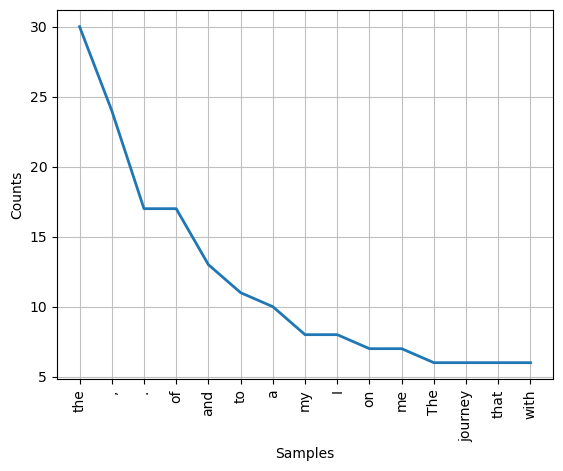

In [7]:
freqdist.plot(15, cumulative=False)
plt.show()

**Conclusiones:** El gráfico muestra la distribución de frecuencia de las palabras más comunes. La altura de cada barra representa la frecuencia de la palabra correspondiente.
Observamos que las palabras comunes, como "was" y "a", son más frecuentes, mientras que las palabras menos comunes, como "Lift" y "just", tienen frecuencias más bajas.

## Exercici 2

Treu les stopwords i realitza stemming al teu conjunt de dades.

**· Stopwords**: Palabras que no aportan información relevante sobre el texto.  
**· Stemming**: Proceso mediante el cual vamos llevar a las palabras a su raiz.

### Stopwords

In [8]:
sw = set(stopwords.words("english"))
print("Stopwords de la librería: " ,sw)

Stopwords de la librería:  {'wouldn', 'that', 'theirs', 'you', 'or', "you've", 'should', 'a', 'aren', 'yourselves', "couldn't", "aren't", 'than', "shan't", 'nor', 'not', 'has', 'there', 'did', 'so', "didn't", 'which', 'couldn', 'each', 'being', 'below', 'now', "doesn't", 'the', 'needn', "needn't", 'few', 'these', 'have', "wouldn't", 'her', "hasn't", "hadn't", 'won', 'between', 'further', 'was', 'with', 'mightn', 'for', 'it', 'haven', 'can', 'before', "you're", 'who', 'd', 'mustn', 'most', 'hasn', 'once', 'shouldn', 'both', 'hers', 'an', 'against', 'this', 'yourself', 'then', 'he', 'some', 'll', 'and', 'but', 'only', "should've", 'over', 'his', 'above', 'too', 'o', "she's", 'ourselves', 'herself', 'during', 'through', 'don', "don't", 'am', 'just', 'when', 'on', 's', 'himself', "wasn't", 'whom', "mightn't", 'all', "won't", 'having', 'our', 'does', 'of', 'y', 'is', 'after', 'such', 'until', 're', 'ain', 'your', 'yours', "that'll", 'will', 'under', 'into', 'were', 'isn', 'again', 'why', "y

### Sin Stopwords

In [9]:
sw_texto=[]
for i in tokenized_word:
    if i not in sw:
        sw_texto.append(i)
print("Texto sin stopwords" ,sw_texto)

Texto sin stopwords ['Walking', 'cinema', ',', 'excitement', 'bubbled', 'I', 'settled', 'seat', ',', 'ready', 'swept', 'away', 'much-anticipated', '``', 'Lift', ',', "''", '2024', 'film', 'directed', 'Julia', 'Harper', '.', 'The', 'dimming', 'lights', 'signaled', 'beginning', 'cinematic', 'journey', 'promised', 'nothing', 'short', 'extraordinary', '.', 'From', 'film', "'s", 'mysterious', 'prologue', ',', 'I', 'found', 'captivated', 'storytelling', 'prowess', 'visual', 'artistry', 'display', '.', 'Julia', 'Harper', "'s", 'direction', ',', 'coupled', 'breathtaking', 'cinematography', ',', 'immediately', 'immersed', 'world', 'emotions', 'picturesque', 'landscapes', 'set', 'stage', 'characters', "'", 'unfolding', 'journey', '.', 'Emily', 'Thompson', "'s", 'portrayal', 'protagonist', 'struck', 'chord', 'within', ',', 'character', 'navigated', 'complexities', 'life', 'authenticity', 'grace', '.', 'The', 'highs', 'lows', 'journey', 'resonated', 'deeply', ',', 'I', 'could', "n't", 'help', 'fee

### Texto Lematizado

In [10]:
ps = PorterStemmer()

stemmed_words = []
for i in sw_texto:
    stemmed_words.append(ps.stem(i))

print("Texto lematizado: " ,stemmed_words)

Texto lematizado:  ['walk', 'cinema', ',', 'excit', 'bubbl', 'i', 'settl', 'seat', ',', 'readi', 'swept', 'away', 'much-anticip', '``', 'lift', ',', "''", '2024', 'film', 'direct', 'julia', 'harper', '.', 'the', 'dim', 'light', 'signal', 'begin', 'cinemat', 'journey', 'promis', 'noth', 'short', 'extraordinari', '.', 'from', 'film', "'s", 'mysteri', 'prologu', ',', 'i', 'found', 'captiv', 'storytel', 'prowess', 'visual', 'artistri', 'display', '.', 'julia', 'harper', "'s", 'direct', ',', 'coupl', 'breathtak', 'cinematographi', ',', 'immedi', 'immers', 'world', 'emot', 'picturesqu', 'landscap', 'set', 'stage', 'charact', "'", 'unfold', 'journey', '.', 'emili', 'thompson', "'s", 'portray', 'protagonist', 'struck', 'chord', 'within', ',', 'charact', 'navig', 'complex', 'life', 'authent', 'grace', '.', 'the', 'high', 'low', 'journey', 'reson', 'deepli', ',', 'i', 'could', "n't", 'help', 'feel', 'person', 'connect', 'raw', 'genuin', 'perform', '.', '``', 'lift', "''", 'unfold', 'theme', 'sel

Observamos que mediante el proceso de lematización, los verbos los pone en infinitivo y de otras palabras se queda sólo con la raiz.

## Exercici 3

Realitza sentiment analysis al teu conjunt de dades.

Análisis de sentimientos [link documentación](https://cienciadedatos.net/documentos/py25-text-mining-python#An%C3%A1lisis-de-sentimientos)

In [14]:
analisis = SentimentIntensityAnalyzer()
analisis.polarity_scores(texto)

{'neg': 0.02, 'neu': 0.786, 'pos': 0.194, 'compound': 0.9968}

Observación: Lo que podemos interpretar lsobre os resutados obtenidos de este análisis es:  
        
        · El 2% del texto se considera negativo.  
        · El 78.6% del texto se considera neutral.  
        · Alrededor del 19.4% del texto se considera positivo.  
        · 0.9968 sugiere una polaridad muy positiva en el texto.  
        
El análisis de sentimientos indica que el texto es mayormente neutral, pero contiene una proporción significativa de palabras positivas y muy pocas palabras negativas. La puntuación compuesta (compound) de 0.9968 confirma una tendencia extremadamente positiva en el texto.